In [1]:
import numpy as np

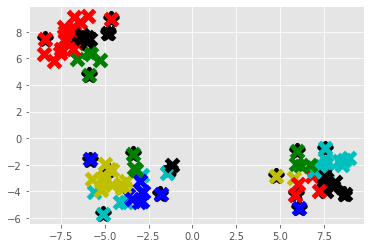

In [1]:
from typing import Union, Optional
import numpy as np


class MeanShift:
    """MeanShift
    Parameters:
    -----------
    radius: float, optional = None
        Radius
    radius_norm_step: int = 100
        Number of radius steps
    """
    def __init__(self, radius: Optional[float] = None, radius_norm_step: int = 100) -> None:
        self.radius = radius
        self.radius_norm_step = radius_norm_step

    def fit(self, data: Union[list, np.ndarray]) -> MeanShift:

        if self.radius is None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step

        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]

        weights = [i for i in range(self.radius_norm_step)][::-1]
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]

                for featureset in data:

                    distance = np.linalg.norm(featureset - centroid)
                    if distance == 0:
                        distance = 0.00000000001
                    weight_index = int(distance / self.radius)
                    if weight_index > self.radius_norm_step - 1:
                        weight_index = self.radius_norm_step - 1

                    to_add = (weights[weight_index] ** 2) * [featureset]
                    in_bandwidth += to_add

                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            to_pop = []

            for i in uniques:
                for ii in [i for i in uniques]:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i) - np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        break

            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass

            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False

            if optimized:
                break

        self.centroids = centroids
        return self

    def predict(self, data: Union[list, np.ndarray]) -> list:
        classifications = []
        for row in data:
            distances = [np.linalg.norm(row - self.centroids[centroid])
                         for centroid in self.centroids]
            classification = (distances.index(min(distances)))
            classifications.append(classification)
        return classifications


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    from matplotlib import style
    from sklearn.datasets import make_blobs
    style.use('ggplot')

    X, y = make_blobs(n_samples=100, centers=3, n_features=2)

    model = MeanShift()
    model.fit(X)

    centroids = model.centroids

    colors = 10 * ['r', 'g', 'b', 'c', 'k', 'y']

    for classification, featureset in zip(model.predict(X), X):
        color = colors[classification]
        plt.scatter(featureset[0], featureset[1], marker="x",
                    color=color, s=150, linewidths=5, zorder=10)

    for c in centroids:
        plt.scatter(centroids[c][0], centroids[c][1],
                    color='k', marker="*", s=150, linewidths=5)

    plt.show()